In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## loading the data
from keras.datasets import boston_housing
(X_train,y_train),(X_test,y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
## overview of data and shape
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [20]:
## Creating model without class (abstraction)
from keras.layers import Dense
from keras.models import Sequential
model = Sequential([
    Dense(8,activation='relu',input_dim=13),
    Dense(1,activation='linear')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='Adam',metrics=['mse','r2_score'],loss='mse')

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    X_train,y_train,
    validation_split = 0.2,
    epochs=10,
    batch_size= 40
)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 42031.3203 - mse: 42031.3203 - r2_score: -599.9757 - val_loss: 36101.6055 - val_mse: 36101.6055 - val_r2_score: -426.1292
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 35241.8867 - mse: 35241.8867 - r2_score: -414.7758 - val_loss: 27603.5215 - val_mse: 27603.5215 - val_r2_score: -325.5858
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 25819.0410 - mse: 25819.0410 - r2_score: -368.9950 - val_loss: 20483.1113 - val_mse: 20483.1113 - val_r2_score: -241.3420
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18414.9590 - mse: 18414.9590 - r2_score: -218.9642 - val_loss: 14853.1191 - val_mse: 14853.1191 - val_r2_score: -174.7318
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13008.2656 - mse: 13008.2666 - r2_score: -157.1753 - val_loss: 10523.9131 - val_mse: 10523.9131 - val_r2_score: -123.5117
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9833.2705 - mse: 9833.2705 - r2_score: -128.5942

In [24]:
metrics_df = pd.DataFrame(history.history)

In [25]:
metrics_df

,loss,mse,r2_score,val_loss,val_mse,val_r2_score
0,41722.199219,41722.199219,-494.766937,36101.605469,36101.605469,-426.129211
1,32556.343750,32556.343750,-385.852142,27603.521484,27603.521484,-325.585754
2,24500.449219,24500.447266,-290.127960,20483.111328,20483.111328,-241.341995
3,17928.984375,17928.984375,-212.042419,14853.119141,14853.119141,-174.731827
4,12845.196289,12845.197266,-151.633774,10523.913086,10523.913086,-123.511650
5,9042.557617,9042.557617,-106.448708,7204.030273,7204.030273,-84.233101
6,6046.271484,6046.271484,-70.845245,4802.294922,4802.294922,-55.817432
7,3979.435791,3979.435791,-46.285896,3097.476562,3097.476562,-35.647202
8,2558.716553,2558.716553,-29.404110,1983.904663,1983.904663,-22.472187
9,1622.745850,1622.745850,-18.282358,1260.399536,1260.399536,-13.912174


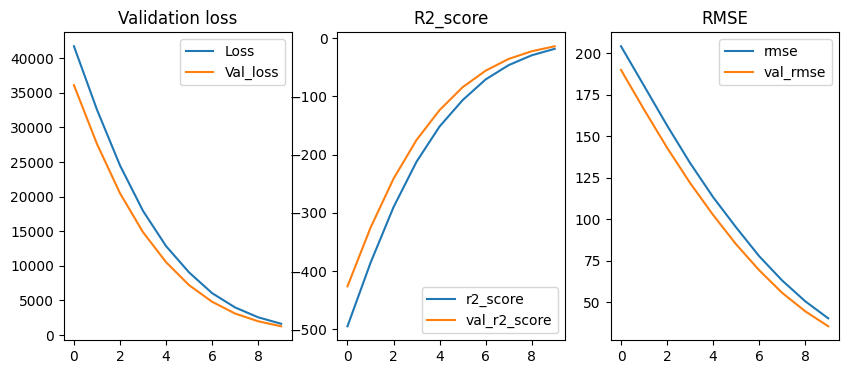

In [34]:
fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(10,4))
## Validation loss
ax[0].plot(metrics_df['loss'],label=['Loss'])
ax[0].plot(metrics_df['val_loss'],label=['Val_loss'])
ax[0].set_title('Validation loss')
ax[0].legend()
## R2_score
ax[1].plot(metrics_df['r2_score'],label=['r2_score'])
ax[1].plot(metrics_df['val_r2_score'],label=['val_r2_score'])
ax[1].set_title('R2_score')
ax[1].legend()
## RMSE
ax[2].plot(np.sqrt(metrics_df['mse']),label=['rmse'])
ax[2].plot(np.sqrt(metrics_df['val_mse']),label=['val_rmse'])
ax[2].set_title('RMSE')
ax[2].legend()


In [37]:
## Building with classes
class BostonHousing:
  def __init__(self,lr_rate_optimizer:float,val_split:float,loss:str,metrics:list,optimizer):
    self.lr_rate_optimizer = lr_rate_optimizer
    self.val_split = val_split
    self.loss = loss
    self.metrics = metrics
    self.optimizer = optimizer

  def load_data(self):
    (self.X_train,self.y_train),(self.X_test,self.y_test) = boston_housing.load_data()
    print(f"Data Loaded !!")
    return self.X_train, self.y_train, self.X_test, self.y_test

  def model_sequential_(self,neurons):
    self.neurons = neurons
    self.model = Sequential([
      Dense(self.neurons,activation='relu',input_dim=self.X_train.shape[1]),
      Dense(1,activation='linear')
    ])
    self.model.compile(optimizer=self.optimizer,metrics=self.metrics,loss=self.loss)

    return  self.model

  def predict(self,X_test):
    self.X_test = X_test
    self.y_pred = self.model.predict(self.X_test)
    return self.y_pred

  def train(self,epochs:int,batch_size:int=None):
    self.epochs = epochs
    self.batch_size = batch_size
    self.history = self.model.fit(
        self.X_train,self.y_train,
        validation_split = self.val_split,
        epochs=self.epochs,
        batch_size= self.batch_size
    )
    return pd.DataFrame(self.history.history)

  def plot_metrics(self,metrics_df):
    self.metrics_df = metrics_df
    fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(10,4))
    ## Validation loss
    ax[0].plot(self.metrics_df['loss'],label=['Loss'])
    ax[0].plot(self.metrics_df['val_loss'],label=['Val_loss'])
    ax[0].set_title('Validation loss')
    ax[0].legend()
    ## R2_score
    ax[1].plot(self.metrics_df['r2_score'],label=['r2_score'])
    ax[1].plot(self.metrics_df['val_r2_score'],label=['val_r2_score'])
    ax[1].set_title('R2_score')
    ax[1].legend()
    ## RMSE
    ax[2].plot(np.sqrt(self.metrics_df['mse']),label=['rmse'])
    ax[2].plot(np.sqrt(self.metrics_df['val_mse']),label=['val_rmse'])
    ax[2].set_title('RMSE')
    ax[2].legend()


In [38]:
model_seq = BostonHousing(0.01,0.2,"mse",['mse','r2_score'],'Adam')

In [39]:
X_train, y_train, X_test, y_test = model_seq.load_data()

Data Loaded !!


In [40]:
model = model_seq.model_sequential_(10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
metrics_df = model_seq.train(50,32)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 4671.7393 - mse: 4671.7393 - r2_score: -49.8417 - val_loss: 2237.6216 - val_mse: 2237.6216 - val_r2_score: -25.4740
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1973.2959 - mse: 1973.2959 - r2_score: -20.1827 - val_loss: 815.3491 - val_mse: 815.3491 - val_r2_score: -8.6466
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 832.1444 - mse: 832.1444 - r2_score: -8.3262 - val_loss: 359.9903 - val_mse: 359.9903 - val_r2_score: -3.2592
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 435.1082 - mse: 435.1082 - r2_score: -4.0048 - val_loss: 292.8338 - val_mse: 292.8338 - val_r2_score: -2.4646
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 402.7893 - mse: 402.7893 - r2_score: -3.8037 - val_loss: 292.2135 - val_mse: 292.2135 - val_r2_score: -2.4573
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 391.8061 - mse: 391.8061 - r2_score: -3.1586 - val_loss: 265.7019 - val_mse: 265.7019 -

In [43]:
y_pred = model_seq.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


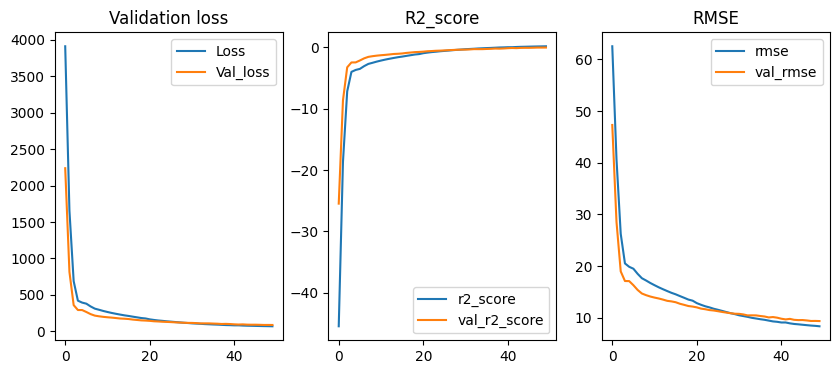

In [45]:
model_seq.plot_metrics(metrics_df)